In [2]:
import mxnet as mx
from gluoncv import model_zoo, data, utils
from matplotlib import pyplot as plt
import matplotlib.image as mpimg
import os
from IPython.display import Image

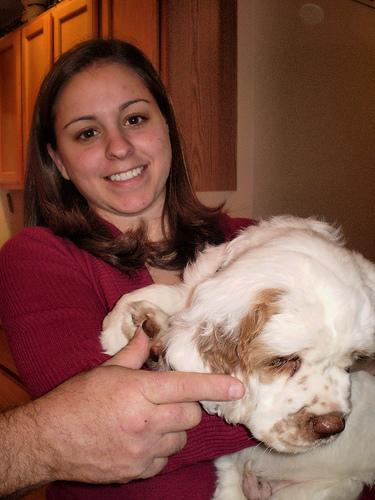

In [16]:
im_fname = '/Users/officialbiznas/Documents/GitHub/ImageSimilarity/data/raw_dog/dog1.jpg'
im_fname = '/Users/officialbiznas/Documents/GitHub/ImageSimilarity/data/raw/clumber/n02101556_374.jpg'
#im_fname = '/Users/officialbiznas/Documents/GitHub/ImageSimilarity/data/raw/setter-irish/n02100877_2824.jpg'
#im_fname = '/Users/officialbiznas/Documents/GitHub/ImageSimilarity/data/raw/setter-irish/n02100877_1913.jpg'
Image(im_fname)

In [17]:
net = model_zoo.get_model('yolo3_darknet53_voc', pretrained=True)

Shape of pre-processed image: (1, 3, 683, 512)


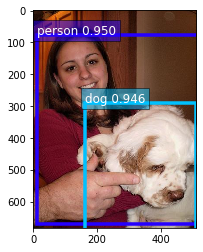

In [18]:
x, img = data.transforms.presets.yolo.load_test(im_fname, short=512)
print('Shape of pre-processed image:', x.shape)
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

In [19]:
for index, bbox in enumerate(bounding_boxs[0]):
    
    class_ID = int(class_IDs[0][index].asnumpy()[0])
    class_name = net.classes[class_ID]
    class_score = scores[0][index].asnumpy()
    if (class_name == 'dog') & (class_score > 0.9):
        print('index: ', index)
        print('class_ID: ', class_ID)
        print('class_name: ', class_name)
        print('class_score: ',class_score)
        print('bbox: ', bbox.asnumpy())
        xmin, ymin, xmax, ymax = [int(x) for x in bbox.asnumpy()]
        xmin = max(0, xmin)
        xmax = min(x.shape[3], xmax)
        ymin = max(0, ymin)
        ymax = min(x.shape[2], ymax)
print(xmin, ymin, xmax, ymax)
#print(xmin, ymin, xmax, ymax)

index:  1
class_ID:  11
class_name:  dog
class_score:  [0.9461291]
bbox:  [163.35382 290.86188 511.8911  692.61237]
163 290 511 683


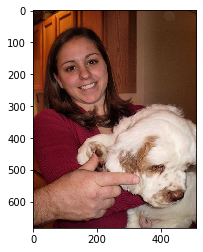

In [20]:
plt.imshow(img)

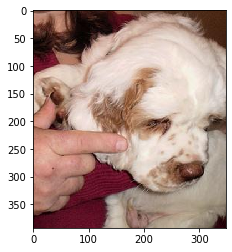

In [21]:
plt.imshow(img[ymin:ymax,xmin:xmax,:])

In [22]:
im_fname_save = '/Users/officialbiznas/Documents/GitHub/ImageSimilarity/data/raw/clumber/n02101556_374_dogCrop.jpg'
plt.imsave(im_fname_save, img[ymin:ymin+ymax,xmin:xmin+xmax,:])

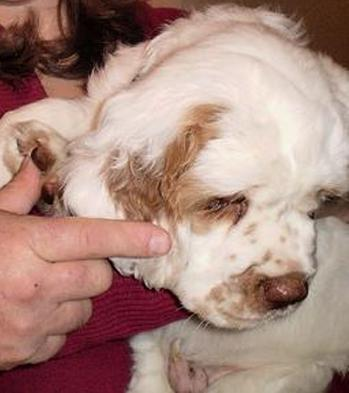

In [23]:
Image(im_fname_save)

In [150]:
print(x[0].shape)
xmin = min(0, xmin)
xmax = min(x.shape[0], xmax)
ymin = min(0, ymin)
ymax = min(x.shape[1], ymax)
mx.image.fixed_crop(x, xmin, ymin, xmax, ymax)

(3, 683, 512)


MXNetError: [15:44:25] src/operator/tensor/./matrix_op-inl.h:683: Check failed: e <= len (3 vs. 1) slicing with end[0]=3 exceeds limit of 1

Stack trace returned 9 entries:
[bt] (0) 0   libmxnet.so                         0x000000011dc98c90 std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2736
[bt] (1) 1   libmxnet.so                         0x000000011dc98a3f std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2143
[bt] (2) 2   libmxnet.so                         0x000000011f0f96c8 void mxnet::op::ClipEx<mshadow::cpu>(nnvm::NodeAttrs const&, mxnet::OpContext const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&, std::__1::vector<mxnet::OpReqType, std::__1::allocator<mxnet::OpReqType> > const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&) + 124856
[bt] (3) 3   libmxnet.so                         0x000000011f086712 void mxnet::op::SliceDimTwoCsrImpl<mshadow::cpu>(nnvm::TShape const&, nnvm::TShape const&, mxnet::OpContext const&, mxnet::NDArray const&, mxnet::NDArray const&) + 37186
[bt] (4) 4   libmxnet.so                         0x000000011f3335a9 mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*) + 1577
[bt] (5) 5   libmxnet.so                         0x000000011f331f06 mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 742
[bt] (6) 6   libmxnet.so                         0x000000011f27dd9e SetNDInputsOutputs(nnvm::Op const*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, int, void* const*, int*, int, int, void***) + 1774
[bt] (7) 7   libmxnet.so                         0x000000011f27eac0 MXImperativeInvokeEx + 176
[bt] (8) 8   libffi.6.dylib                      0x000000010e984884 ffi_call_unix64 + 76



In [84]:
image = mx.image.imdecode(open(im_fname, 'rb').read()).astype(np.float32)
print(image.shape)
resized = mx.image.resize_short(image, 512)
print('Shape of pre-processed image:', resized.shape)
class_IDs, scores, bounding_boxs = net(x)

ax = utils.viz.plot_bbox(img, bounding_boxs[0], scores[0],
                         class_IDs[0], class_names=net.classes)
plt.show()

(500, 375, 3)
Shape of pre-processed image: (682, 512, 3)


MXNetError: [14:59:53] src/operator/nn/convolution.cc:148: Check failed: dshp.ndim() == 4U (3 vs. 4) Input data should be 4D in batch-num_filter-y-x

Stack trace returned 8 entries:
[bt] (0) 0   libmxnet.so                         0x000000011dc98c90 std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2736
[bt] (1) 1   libmxnet.so                         0x000000011dc98a3f std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2143
[bt] (2) 2   libmxnet.so                         0x000000011df371f9 void mxnet::op::ConcatCSRImpl<mshadow::cpu>(nnvm::NodeAttrs const&, mxnet::OpContext const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&, std::__1::vector<mxnet::OpReqType, std::__1::allocator<mxnet::OpReqType> > const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&) + 176809
[bt] (3) 3   libmxnet.so                         0x000000011f3335a9 mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*) + 1577
[bt] (4) 4   libmxnet.so                         0x000000011f331f06 mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 742
[bt] (5) 5   libmxnet.so                         0x000000011f27dd9e SetNDInputsOutputs(nnvm::Op const*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, int, void* const*, int*, int, int, void***) + 1774
[bt] (6) 6   libmxnet.so                         0x000000011f27eac0 MXImperativeInvokeEx + 176
[bt] (7) 7   libffi.6.dylib                      0x000000010e984884 ffi_call_unix64 + 76



In [ ]:
image = mx.image.imdecode(open(fnx, 'rb').read()).astype(np.float32)

In [72]:
print(bounding_boxs[0][0][0].asnumpy())
print(bounding_boxs[0][0][0])
print(bounding_boxs[0][0][0][0])
xmin, ymin, xmax, ymax = [int(x) for x in bounding_boxs[0][0].asnumpy()]
print(xmin, ymin, xmax, ymax)

[-8.253052]

[-8.253052]
<NDArray 1 @cpu(0)>

[-8.253052]
<NDArray 1 @cpu(0)>
-8 44 476 634


In [92]:
print(x[0].shape)
xmin = min(0, xmin)
xmax = min(x.shape[0], xmax)
ymin = min(0, ymin)
ymax = min(x.shape[1], ymax)
#image.fixed_crop(src, x0, y0, w, h, size=None, interp=2)
mx.image.fixed_crop(x, xmin, ymin, xmax, ymax)

(3, 683, 512)


MXNetError: [15:07:18] src/operator/tensor/./matrix_op-inl.h:683: Check failed: e <= len (3 vs. 1) slicing with end[0]=3 exceeds limit of 1

Stack trace returned 9 entries:
[bt] (0) 0   libmxnet.so                         0x000000011dc98c90 std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2736
[bt] (1) 1   libmxnet.so                         0x000000011dc98a3f std::__1::__tree<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::__map_value_compare<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, std::__1::less<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> > >, true>, std::__1::allocator<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*> > >::destroy(std::__1::__tree_node<std::__1::__value_type<std::__1::basic_string<char, std::__1::char_traits<char>, std::__1::allocator<char> >, mxnet::NDArrayFunctionReg*>, void*>*) + 2143
[bt] (2) 2   libmxnet.so                         0x000000011f0f96c8 void mxnet::op::ClipEx<mshadow::cpu>(nnvm::NodeAttrs const&, mxnet::OpContext const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&, std::__1::vector<mxnet::OpReqType, std::__1::allocator<mxnet::OpReqType> > const&, std::__1::vector<mxnet::NDArray, std::__1::allocator<mxnet::NDArray> > const&) + 124856
[bt] (3) 3   libmxnet.so                         0x000000011f086712 void mxnet::op::SliceDimTwoCsrImpl<mshadow::cpu>(nnvm::TShape const&, nnvm::TShape const&, mxnet::OpContext const&, mxnet::NDArray const&, mxnet::NDArray const&) + 37186
[bt] (4) 4   libmxnet.so                         0x000000011f3335a9 mxnet::imperative::SetShapeType(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, mxnet::DispatchMode*) + 1577
[bt] (5) 5   libmxnet.so                         0x000000011f331f06 mxnet::Imperative::Invoke(mxnet::Context const&, nnvm::NodeAttrs const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> > const&) + 742
[bt] (6) 6   libmxnet.so                         0x000000011f27dd9e SetNDInputsOutputs(nnvm::Op const*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, std::__1::vector<mxnet::NDArray*, std::__1::allocator<mxnet::NDArray*> >*, int, void* const*, int*, int, int, void***) + 1774
[bt] (7) 7   libmxnet.so                         0x000000011f27eac0 MXImperativeInvokeEx + 176
[bt] (8) 8   libffi.6.dylib                      0x000000010e984884 ffi_call_unix64 + 76



In [8]:
print(class_IDs.asnumpy()[0][0][0],
      net.classes[int(class_IDs.asnumpy()[0][0][0])],
      scores.asnumpy()[0][0][0],
     bounding_boxs.asnumpy()[0][0])

11.0 dog 0.98457205 [-10.250336  50.802765 544.0211   642.37854 ]


In [24]:
img=img 
bboxes = bounding_boxs[0]
absolute_coordinates=True
scale = 1
colors=None

cls_id = class_IDs.asnumpy()[0][0][0]
if colors is None:
    colors = dict()
if isinstance(bboxes, mx.nd.NDArray):
        bboxes = bboxes.asnumpy()
#if isinstance(labels, mx.nd.NDArray):
#    labels = labels.asnumpy()
#if isinstance(scores, mx.nd.NDArray):
#    scores = scores.asnumpy()
#if len(bboxes) < 1:
#    return img

if not absolute_coordinates:
    # convert to absolute coordinates using image shape
    height = img.shape[0]
    width = img.shape[1]
    bboxes[:, (0, 2)] *= width
    bboxes[:, (1, 3)] *= height
else:
    bboxes *= scale
bbox = bboxes[0]

xmin, ymin, xmax, ymax = [int(x) for x in bbox]
bcolor = 10#[x * 255 for x in colors[0]]
cv2.rectangle(img, (xmin, ymin), (xmax, ymax), bcolor, 2)
img
plt.show()

In [9]:
import cv2
import numpy as np

def getSubImage(rect, src):
    # Get center, size, and angle from rect
    center, size, theta = rect
    # Convert to int 
    center, size = tuple(map(int, center)), tuple(map(int, size))
    # Get rotation matrix for rectangle
    M = cv2.getRotationMatrix2D( center, theta, 1)
    # Perform rotation on src image
    dst = cv2.warpAffine(src, M, src.shape[:2])
    out = cv2.getRectSubPix(dst, size, center)
    return out

img = cv2.imread(im_fname)
# Find some contours
thresh2, contours, hierarchy = cv2.findContours(img, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
# Get rotated bounding box
rect = cv2.minAreaRect(contours[0])
# Extract subregion
out = getSubImage(rect, img)
# Save image
cv2.imwrite('out.jpg', out)

error: OpenCV(3.4.1) /opt/conda/conda-bld/opencv-suite_1530774556719/work/modules/imgproc/src/contours.cpp:199: error: (-210) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function cvStartFindContours_Impl


In [40]:
cls_id = int(class_IDs[0].flat[i]) if class_IDs[0] is not None else -1
if class_names is not None and cls_id < len(class_names):
            class_name = class_names[cls_id]

AttributeError: 'NDArray' object has no attribute 'flat'